In [27]:
import yfinance as yf

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ***Data Preprocessing***

In [29]:
ticker = 'AAPL'
stock_data = yf.download(ticker, start='2010-01-01', end='2020-01-01')

selected_columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
stock_data = stock_data[selected_columns]

if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = stock_data.columns.get_level_values(0)

stock_data.to_csv('apple_stock_data.csv')

print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

Price                      Adj Close     Close      High       Low      Open  \
Date                                                                           
2010-01-04 00:00:00+00:00   6.447412  7.643214  7.660714  7.585000  7.622500   
2010-01-05 00:00:00+00:00   6.458559  7.656429  7.699643  7.616071  7.664286   
2010-01-06 00:00:00+00:00   6.355826  7.534643  7.686786  7.526786  7.656429   
2010-01-07 00:00:00+00:00   6.344078  7.520714  7.571429  7.466071  7.562500   
2010-01-08 00:00:00+00:00   6.386256  7.570714  7.571429  7.466429  7.510714   

Price                         Volume  
Date                                  
2010-01-04 00:00:00+00:00  493729600  
2010-01-05 00:00:00+00:00  601904800  
2010-01-06 00:00:00+00:00  552160000  
2010-01-07 00:00:00+00:00  477131200  
2010-01-08 00:00:00+00:00  447610800  


In [30]:
print(stock_data.isna().sum())

Price
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [31]:
df = pd.read_csv('apple_stock_data.csv', index_col='Date', parse_dates=True)

full_range = pd.date_range(start=df.index.min(), end=df.index.max())

df_full = df.reindex(full_range)

df_full = df_full.interpolate(method='linear')

df_full.index.name = 'Date'

df_full.to_csv('apple_stock_data_filled.csv')

print(df_full.isna().sum())

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [32]:
apple_data=pd.read_csv('apple_stock_data_filled.csv')

apple_data.head(90)

,Date,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04 00:00:00+00:00,6.447412,7.643214,7.660714,7.585000,7.622500,493729600.0
1,2010-01-05 00:00:00+00:00,6.458559,7.656429,7.699643,7.616071,7.664286,601904800.0
2,2010-01-06 00:00:00+00:00,6.355826,7.534643,7.686786,7.526786,7.656429,552160000.0
3,2010-01-07 00:00:00+00:00,6.344078,7.520714,7.571429,7.466071,7.562500,477131200.0
4,2010-01-08 00:00:00+00:00,6.386256,7.570714,7.571429,7.466429,7.510714,447610800.0
...,...,...,...,...,...,...,...
85,2010-03-30 00:00:00+00:00,7.105378,8.423214,8.481429,8.366071,8.450000,527310000.0
86,2010-03-31 00:00:00+00:00,7.079772,8.392857,8.450357,8.373571,8.410357,430659600.0
87,2010-04-01 00:00:00+00:00,7.108995,8.427500,8.526071,8.312500,8.478929,603145200.0
88,2010-04-02 00:00:00+00:00,7.127975,8.450000,8.524107,8.330536,8.457232,623485800.0


In [33]:
apple_data['Date']=pd.to_datetime(apple_data['Date'])
apple_data.set_index('Date',inplace=True)

In [34]:
apple_data.head(90)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04 00:00:00+00:00,6.447412,7.643214,7.660714,7.585000,7.622500,493729600.0
2010-01-05 00:00:00+00:00,6.458559,7.656429,7.699643,7.616071,7.664286,601904800.0
2010-01-06 00:00:00+00:00,6.355826,7.534643,7.686786,7.526786,7.656429,552160000.0
2010-01-07 00:00:00+00:00,6.344078,7.520714,7.571429,7.466071,7.562500,477131200.0
2010-01-08 00:00:00+00:00,6.386256,7.570714,7.571429,7.466429,7.510714,447610800.0
...,...,...,...,...,...,...
2010-03-30 00:00:00+00:00,7.105378,8.423214,8.481429,8.366071,8.450000,527310000.0
2010-03-31 00:00:00+00:00,7.079772,8.392857,8.450357,8.373571,8.410357,430659600.0
2010-04-01 00:00:00+00:00,7.108995,8.427500,8.526071,8.312500,8.478929,603145200.0


In [36]:
apple_data.shape

(3649, 6)

In [37]:
apple_data.isnull().sum()

,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


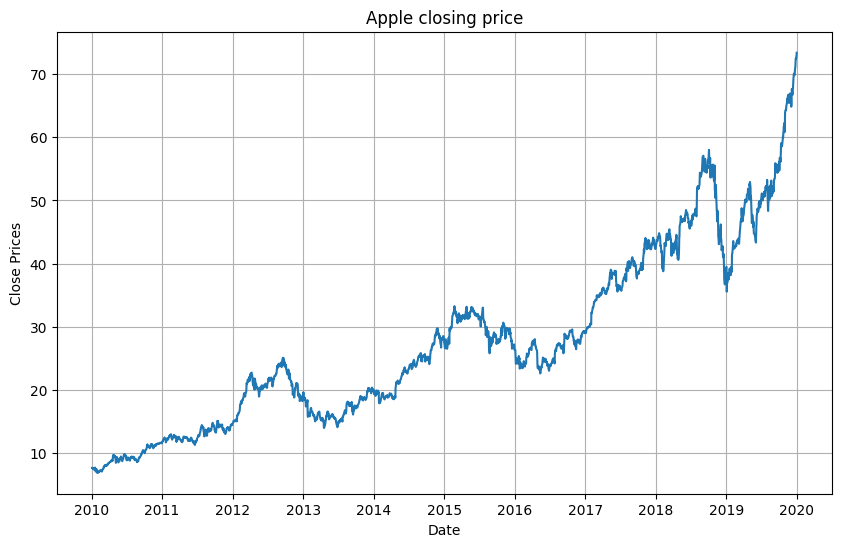

In [38]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(apple_data['Close'])
plt.title('Apple closing price')
plt.show()

<Axes: >

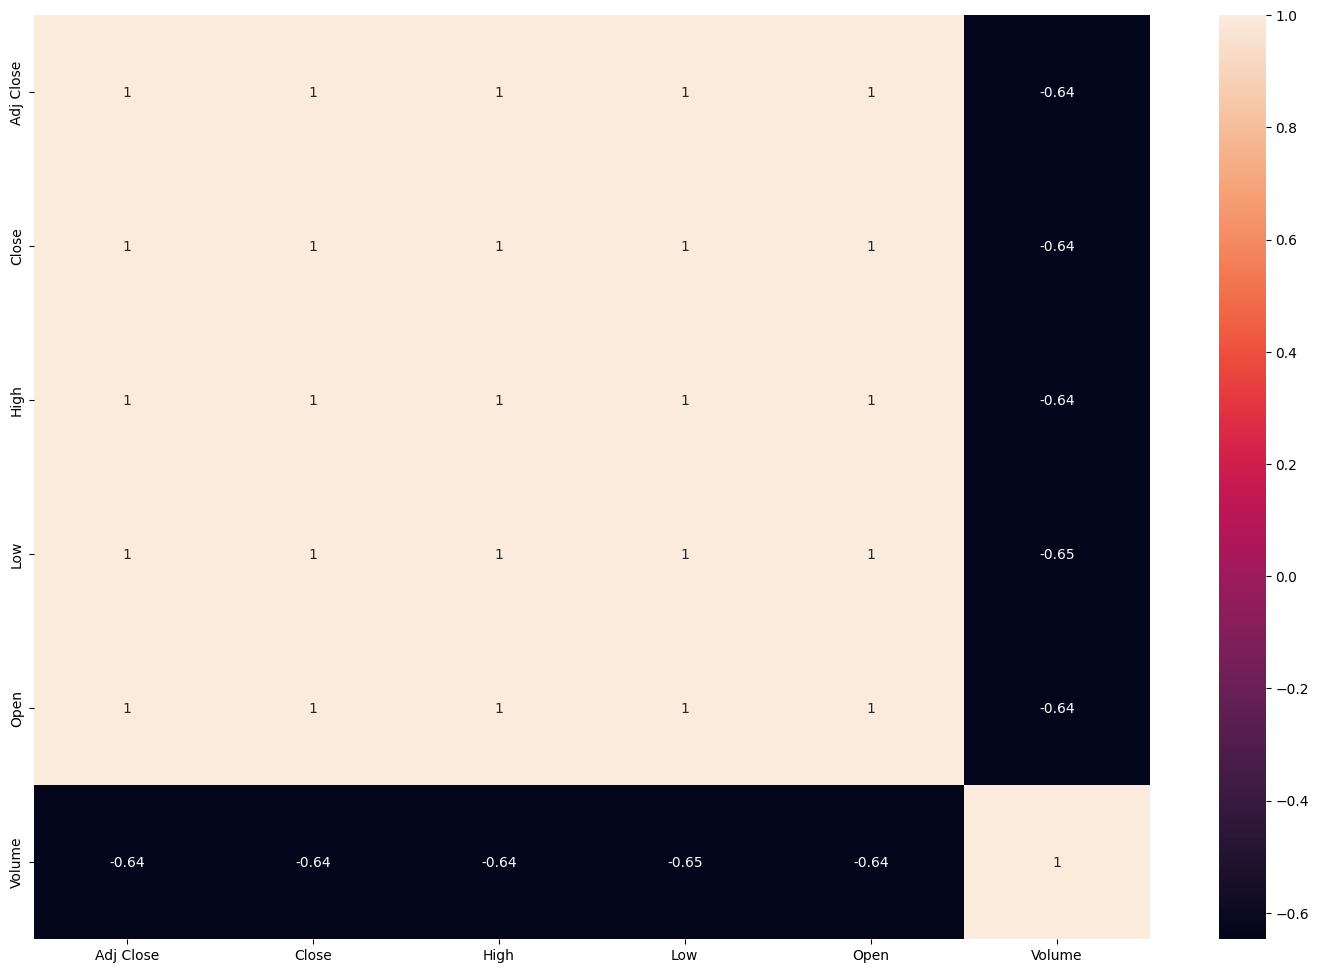

In [39]:
plt.figure(figsize=(18,12))
sns.heatmap(apple_data.corr(),annot=True)

In [40]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [41]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing and plotting rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    #ADF Test
    print("\nResults of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

    if(adft[0] < adft[4]['5%']):
      print("\nTime Series is Stationary")
    else:
      print("\nTime Series is Non-Stationary")


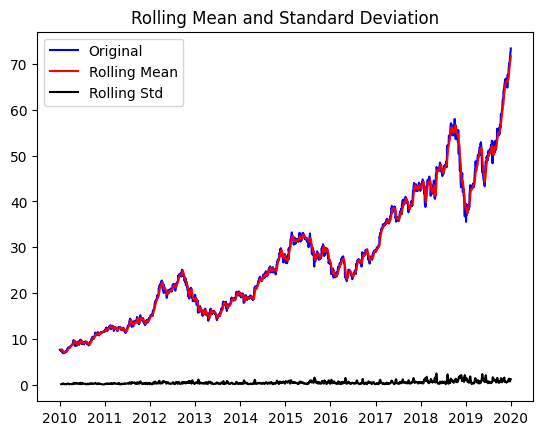


Results of dickey fuller test
Test Statistics                   1.699906
p-value                           0.998128
No. of lags used                  1.000000
Number of observations used    3647.000000
critical value (1%)              -3.432144
critical value (5%)              -2.862333
critical value (10%)             -2.567192
dtype: float64

Time Series is Non-Stationary


In [42]:
test_stationarity(apple_data['Close'])

# **ARIMA**


In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [44]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.9 MB/s eta 0:00:00


In [45]:
df=pd.read_csv('apple_stock_data_filled.csv')
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df = df[['Close']].copy()
df.head(5)
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]
print("full data:")
print(df.head())

print("Train data:")
print(train_data.head())
df=train_data
print("Test data:")
print(test_data.head())

full data:
                              Close
Date                               
2010-01-04 00:00:00+00:00  7.643214
2010-01-05 00:00:00+00:00  7.656429
2010-01-06 00:00:00+00:00  7.534643
2010-01-07 00:00:00+00:00  7.520714
2010-01-08 00:00:00+00:00  7.570714
Train data:
                              Close
Date                               
2010-01-04 00:00:00+00:00  7.643214
2010-01-05 00:00:00+00:00  7.656429
2010-01-06 00:00:00+00:00  7.534643
2010-01-07 00:00:00+00:00  7.520714
2010-01-08 00:00:00+00:00  7.570714
Test data:
                               Close
Date                                
2018-01-01 00:00:00+00:00  42.875624
2018-01-02 00:00:00+00:00  43.064999
2018-01-03 00:00:00+00:00  43.057499
2018-01-04 00:00:00+00:00  43.257500
2018-01-05 00:00:00+00:00  43.750000


In [46]:
train_data.shape

(2919, 1)

In [47]:
test_data.shape

(730, 1)

In [48]:
test_data.tail(10)

,Close
Date,
2019-12-22 00:00:00+00:00,70.620000
2019-12-23 00:00:00+00:00,71.000000
2019-12-24 00:00:00+00:00,71.067497
2019-12-25 00:00:00+00:00,71.772499
2019-12-26 00:00:00+00:00,72.477501
2019-12-27 00:00:00+00:00,72.449997
2019-12-28 00:00:00+00:00,72.593330
2019-12-29 00:00:00+00:00,72.736664
2019-12-30 00:00:00+00:00,72.879997


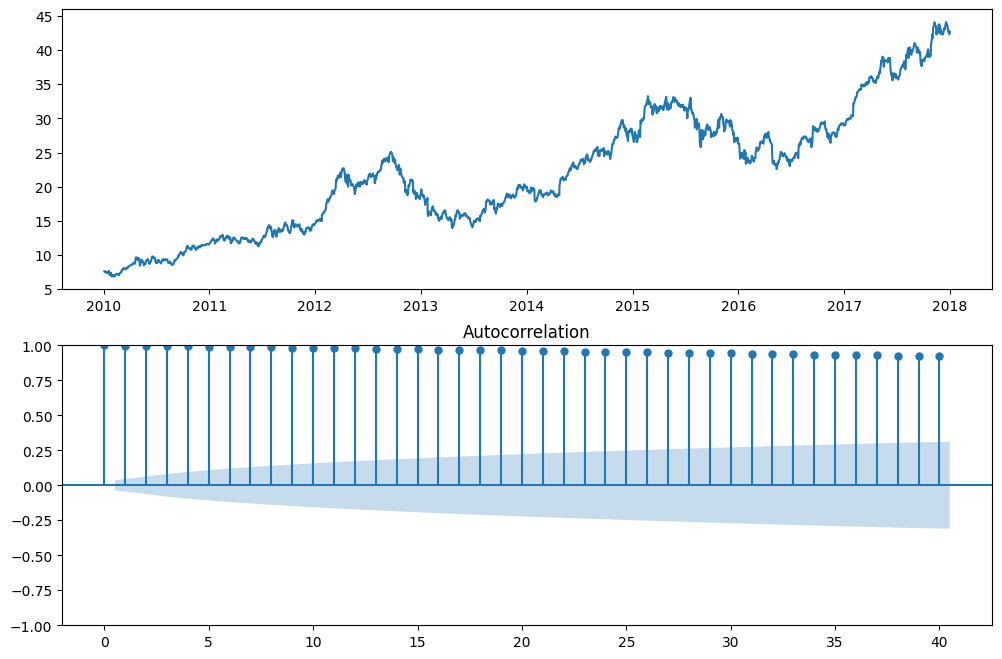

In [49]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
ax1.plot(df)
ax2 = fig.add_subplot(212)
fig = plot_acf(df.dropna(), lags=40, ax=ax2)

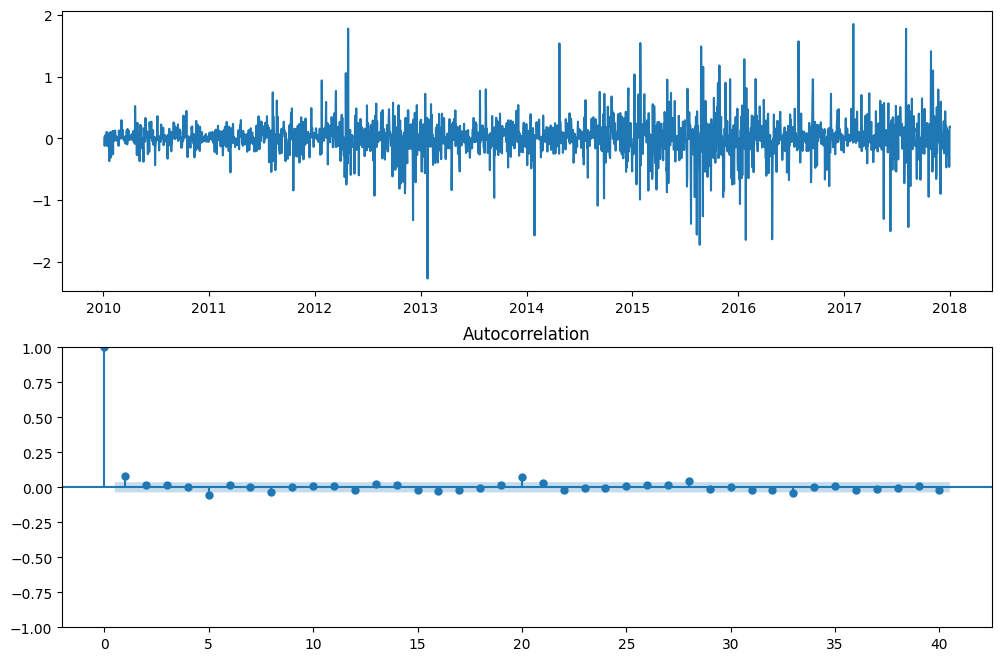

In [50]:
diff = df.diff().dropna()

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
ax1.plot(diff)
ax2 = fig.add_subplot(212)
fig = plot_acf(diff.dropna(), lags=40, ax=ax2)

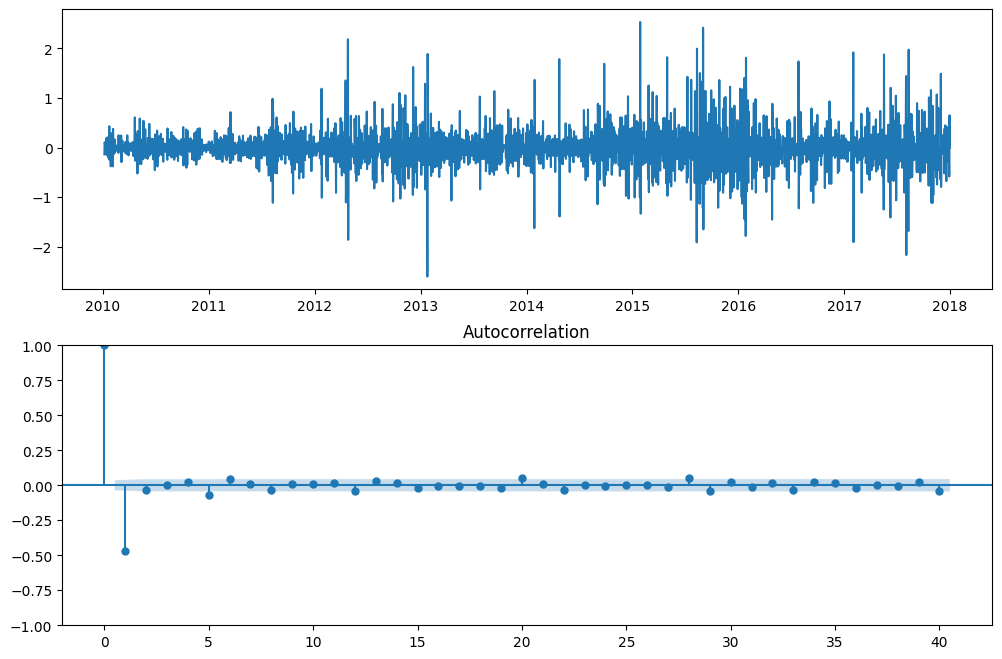

In [51]:
diff = df.diff().diff().dropna()

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
ax1.plot(diff)
ax2 = fig.add_subplot(212)
fig = plot_acf(diff.dropna(), lags=40, ax=ax2)

Seeing the above we can detemine that one differencing is enought to convert to stationary and when there we diff twice we get one huge lag so we will have our D value as 1

determining d using inbuilt function


In [52]:
from pmdarima.arima.utils import ndiffs

In [54]:
ndiffs(df, test='adf')

1

Now determining P


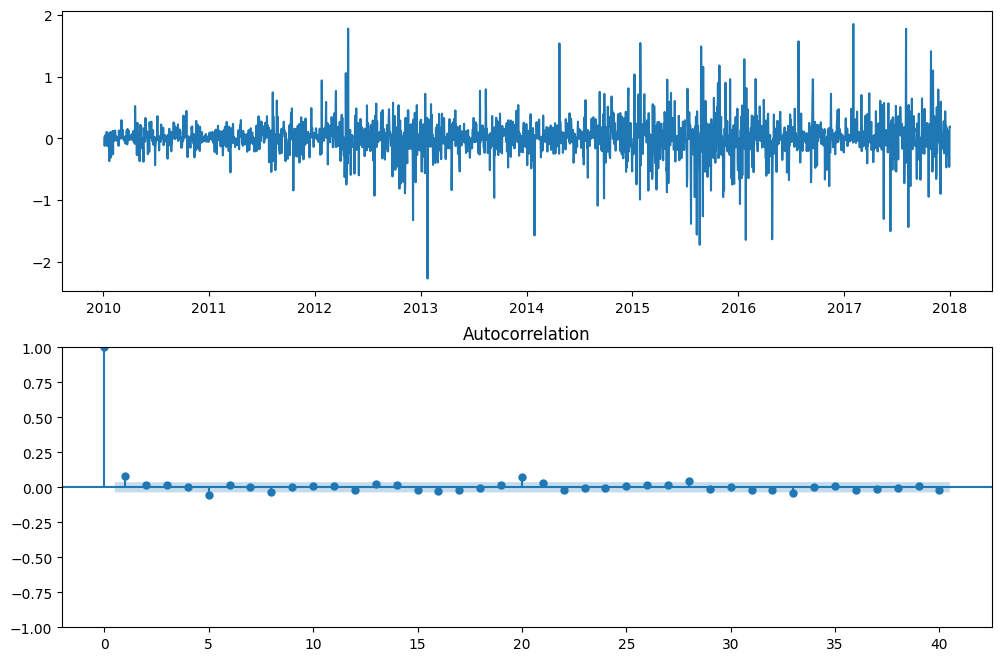

In [55]:
diff = df.diff().dropna()

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
ax1.plot(diff)
ax2 = fig.add_subplot(212)
fig = plot_acf(diff.dropna(), lags=40, ax=ax2)

As you can see the closest lag here from the dense part is the 6th lag so by using n-1 formula we get the p value to be 5

Now determining Q


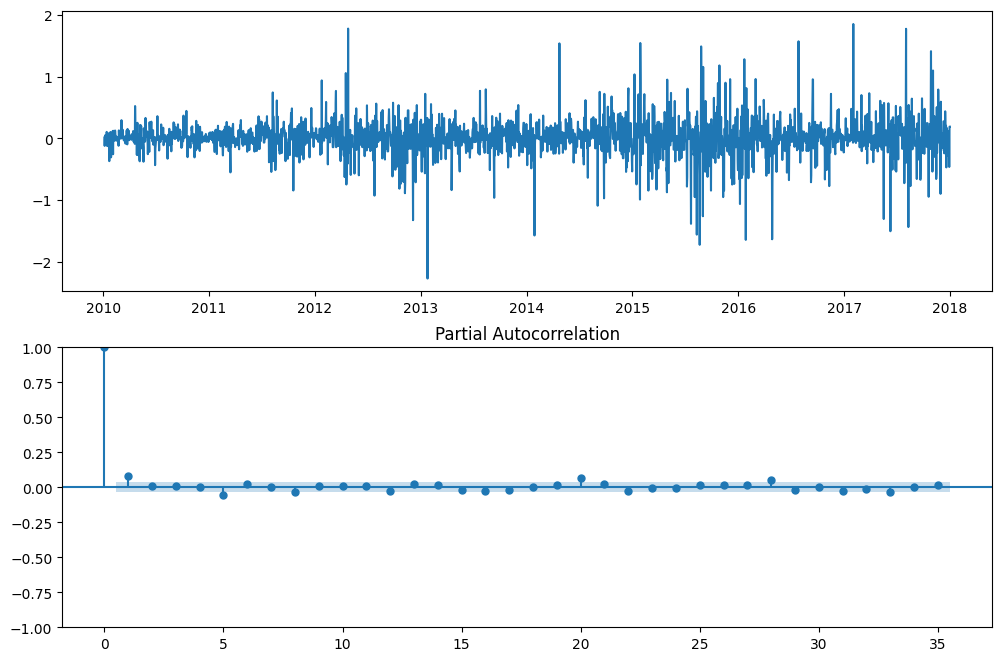

In [56]:
diff = df.diff().dropna()

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
ax1.plot(diff)
ax2 = fig.add_subplot(212)
fig = plot_pacf(diff.dropna(), ax=ax2)

as you can see above the lag which is closest inside the dense area is 2st one so by using (n-1) formula Q value is 1

In [57]:
df.head(10)

,Close
Date,
2010-01-04 00:00:00+00:00,7.643214
2010-01-05 00:00:00+00:00,7.656429
2010-01-06 00:00:00+00:00,7.534643
2010-01-07 00:00:00+00:00,7.520714
2010-01-08 00:00:00+00:00,7.570714
2010-01-09 00:00:00+00:00,7.548452
2010-01-10 00:00:00+00:00,7.526191
2010-01-11 00:00:00+00:00,7.503929
2010-01-12 00:00:00+00:00,7.418571


In [84]:
import warnings

warnings.filterwarnings("ignore")

In [85]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

days_to_predict = 10
additional_days = 30
years_to_show = 2
window_size = 365 * years_to_show

total_test_days = len(test_data)
#iterations = total_test_days // days_to_predict
iterations=73
print(f"Total test days: {total_test_days}")
print(f"Number of iterations: {iterations}")

all_forecasts = np.array([])

for i in range(iterations):
    print(f"Iteration {i+1}")

    model = ARIMA(df['Close'].dropna(), order=(10, 1, 3))
    model_fit = model.fit()

    future_dates = [df.index[-1] + DateOffset(days=x) for x in range(1, days_to_predict + 1)]
    future_datest_df = pd.DataFrame(index=future_dates, columns=df.columns)

    future_df = pd.concat([df, future_datest_df])

    future_df['future_forecast'] = model_fit.predict(start=len(df), end=len(future_df)-1, typ='levels', dynamic=True)

    all_forecasts = np.append(all_forecasts, future_df['future_forecast'].loc[future_dates].values)


    future_df.loc[future_dates, 'Close'] = test_data['Close'].loc[future_dates]

    df = future_df.copy().iloc[-window_size:]


Total test days: 730
Number of iterations: 73
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73


In [86]:
all_forecasts[1:6]

array([42.69266945, 42.72114839, 42.69996267, 42.691538  , 42.71128798])

In [87]:
test_data.head()

,Adj Close,Close,High,Low
Date,,,,
2018-01-01 00:00:00+00:00,40.346150,42.875624,42.968125,42.312499
2018-01-02 00:00:00+00:00,40.524353,43.064999,43.075001,42.314999
2018-01-03 00:00:00+00:00,40.517288,43.057499,43.637501,42.990002
2018-01-04 00:00:00+00:00,40.705498,43.257500,43.367500,43.020000
2018-01-05 00:00:00+00:00,41.168941,43.750000,43.842499,43.262501


In [88]:
print("Average Errors ARIMA:")
rmse = mean_squared_error(test_data['Close'], all_forecasts)
rmse = np.sqrt(rmse)
print('RMSE: '+str(rmse))
mae = mean_absolute_error(test_data['Close'], all_forecasts)
print('MAE: '+str(mae))
r2 = r2_score(test_data['Close'], all_forecasts)
print('R2: '+str(r2))

Average Errors ARIMA:
RMSE: 1.6248067496226128
MAE: 1.15052151355819
R2: 0.954098010774938


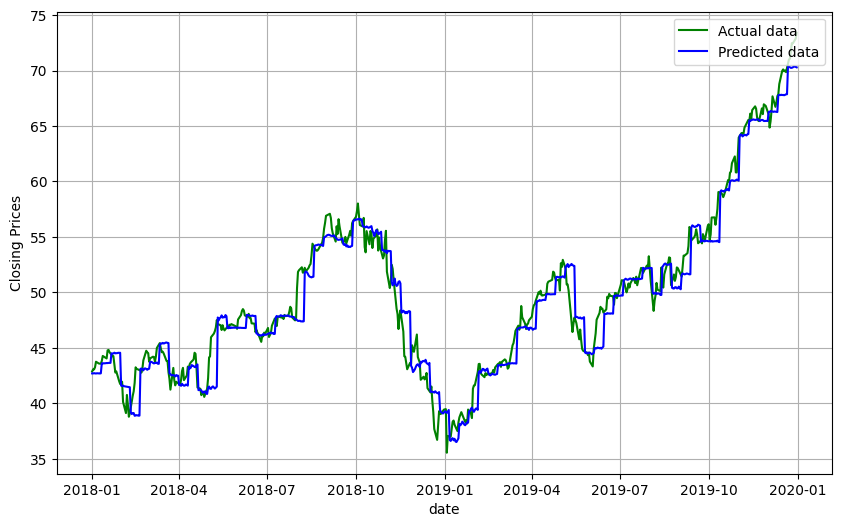

In [89]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('date')
plt.ylabel('Closing Prices')
plt.plot(test_data.index,test_data['Close'], 'green', label='Actual data')
plt.plot(test_data.index,all_forecasts, 'blue', label='Predicted data')
plt.legend(loc="upper right")
plt.show()

# **Training Model LSTM**

In [66]:
!pip install scikeras


In [67]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [68]:
np.random.seed(123)
tf.random.set_seed(123)

In [69]:
apple_data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04 00:00:00+00:00,6.447412,7.643214,7.660714,7.585000,7.622500,493729600.0
2010-01-05 00:00:00+00:00,6.458559,7.656429,7.699643,7.616071,7.664286,601904800.0
2010-01-06 00:00:00+00:00,6.355826,7.534643,7.686786,7.526786,7.656429,552160000.0
2010-01-07 00:00:00+00:00,6.344078,7.520714,7.571429,7.466071,7.562500,477131200.0
2010-01-08 00:00:00+00:00,6.386256,7.570714,7.571429,7.466429,7.510714,447610800.0


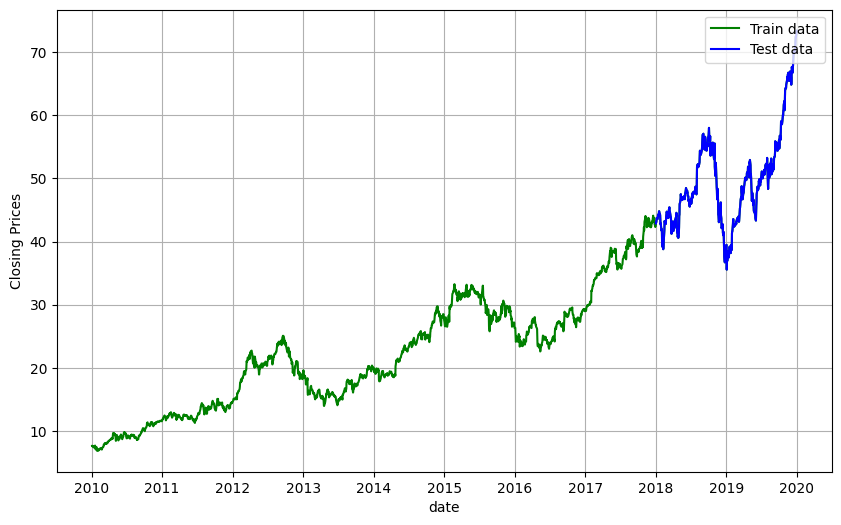

In [70]:
#split data into train and training set
train_data, test_data = apple_data.iloc[:int(len(apple_data)*0.8),:4], apple_data.iloc[int(len(apple_data)*0.8):,:4]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('date')
plt.ylabel('Closing Prices')
plt.plot(apple_data['Close'], 'green', label='Train data')
plt.plot(test_data['Close'], 'blue', label='Test data')
plt.legend(loc="upper right")
plt.show()

In [71]:
print(train_data.shape)

(2919, 4)


In [72]:
print(test_data.shape)

(730, 4)


In [73]:
train_data.head()

,Adj Close,Close,High,Low
Date,,,,
2010-01-04 00:00:00+00:00,6.447412,7.643214,7.660714,7.585000
2010-01-05 00:00:00+00:00,6.458559,7.656429,7.699643,7.616071
2010-01-06 00:00:00+00:00,6.355826,7.534643,7.686786,7.526786
2010-01-07 00:00:00+00:00,6.344078,7.520714,7.571429,7.466071
2010-01-08 00:00:00+00:00,6.386256,7.570714,7.571429,7.466429


In [74]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_data)

# Creating a data structure with 45 time-steps and 1 output
X_train = []
y_train = []
time_steps = 30  # Number of previous days to consider
for i in range(time_steps, len(training_set_scaled)):
   #if len(training_set_scaled[i-60:i, 0]) == 60:
    X_train.append(training_set_scaled[i-time_steps:i,0:3])  # Previous 50 days of features
    y_train.append(training_set_scaled[i, 3])  # Close price as target (index 3)
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_train.shape

(2889, 30, 3)

In [75]:
# Function to create the LSTM model
def create_model(units=50, dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units//2, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units//4, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units//8))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [76]:
from scikeras.wrappers import KerasRegressor

# Wrap the model for use in scikit-learn
model = KerasRegressor(model=create_model, verbose=0)


In [77]:
final_model = create_model(units=100,dropout_rate=0.2,optimizer='adam')
history = final_model.fit(X_train,y_train,epochs=60,batch_size=32,verbose=1)

Epoch 1/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0436
Epoch 2/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0071
Epoch 3/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0066
Epoch 4/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0052
Epoch 5/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0053
Epoch 6/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0048
Epoch 7/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0043
Epoch 8/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0043
Epoch 9/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0044
Epoch 10/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0035
Epoch 11/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0039
Epoch 12/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0034
Epoch 13/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0032
Epoch 14/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0029
Epoch 15/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0039
Epoc

In [78]:
test_data.head()

,Adj Close,Close,High,Low
Date,,,,
2018-01-01 00:00:00+00:00,40.346150,42.875624,42.968125,42.312499
2018-01-02 00:00:00+00:00,40.524353,43.064999,43.075001,42.314999
2018-01-03 00:00:00+00:00,40.517288,43.057499,43.637501,42.990002
2018-01-04 00:00:00+00:00,40.705498,43.257500,43.367500,43.020000
2018-01-05 00:00:00+00:00,41.168941,43.750000,43.842499,43.262501


In [79]:
time_steps=30
Y_test = []
for i in range(time_steps,len(test_data)):
    Y_test.append(test_data.values[i,3])
inputs = test_data.values  # Convert Series to NumPy array first
inputs = sc.transform(inputs)
X_test = []
for i in range(time_steps, len(inputs)):
    X_test.append(inputs[i-time_steps:i,0:3])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])
print(X_test.shape)

(700, 30, 3)


In [80]:
Y_test

array([41.625     , 41.68999863, 40.02500153, 39.68333435, 39.34166718,
       39.        , 38.5       , 39.76750183, 38.75749969, 37.56000137,
       38.16583379, 38.77166621, 39.37749863, 40.41249847, 40.72000122,
       42.25      , 42.94250107, 42.92062569, 42.89875031, 42.87687492,
       42.85499954, 42.75249863, 42.92750168, 43.38499832, 43.60749944,
       43.83000056, 44.05250168, 44.54000092, 44.51250076, 43.16500092,
       43.11249924, 43.28499985, 43.45750046, 43.63000107, 44.03250122,
       43.56750107, 43.76750183, 44.34749985, 44.58250046, 44.81750107,
       45.05250168, 44.81000137, 44.45249939, 44.51750183, 44.40499878,
       44.07499949, 43.7450002 , 43.41500092, 43.73500061, 42.81499863,
       42.15000153, 41.23500061, 41.36000061, 41.48500061, 41.61000061,
       41.72999954, 41.29750061, 41.72499847, 41.57312393, 41.42124939,
       41.26937485, 41.11750031, 41.22000122, 41.19250107, 43.02000046,
       42.04999924, 42.1875    , 42.32500076, 42.46250153, 42.88

In [81]:
# Predicted stock prices from the model
predicted_stock_scaled = final_model.predict(X_test)

# Create an array of zeros with the same number of rows as predicted_stock_scaled
# and 5 columns to match the other features (Open, High, Low, Close)
placeholders = np.zeros((len(predicted_stock_scaled), 3))

# Concatenate placeholders for the first 3 features with the predicted Close prices
predicted_with_placeholders = np.concatenate((placeholders, predicted_stock_scaled), axis=1)

# Apply inverse_transform to rescale back to original values
predicted_original_scale = sc.inverse_transform(predicted_with_placeholders)

# Extract the predicted Close prices (4th column)
predicted_stock_price = predicted_original_scale[:, 3]

# Check the output
predicted_stock_price

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


array([42.97029552, 42.74087599, 42.57775248, 42.40362584, 42.15435667,
       41.81532402, 41.41383763, 41.0798136 , 40.86912138, 40.72142865,
       40.57731854, 40.44338411, 40.37273525, 40.42195003, 40.60835615,
       40.92952413, 41.40811161, 41.9892482 , 42.56238772, 43.02244593,
       43.31290199, 43.43499266, 43.42535392, 43.35720057, 43.33350424,
       43.42191214, 43.63392914, 43.93710921, 44.26264763, 44.54062175,
       44.69465228, 44.70449348, 44.60954092, 44.47849812, 44.37456261,
       44.33059413, 44.31920809, 44.3322578 , 44.40712745, 44.56140005,
       44.77902424, 45.0240242 , 45.23766085, 45.35237942, 45.35011718,
       45.24938138, 45.08615224, 44.89731222, 44.70922482, 44.54258031,
       44.36508672, 44.12950103, 43.78692097, 43.3900515 , 43.05780557,
       42.90362099, 42.91185573, 42.96649284, 42.99299277, 42.9607096 ,
       42.87276824, 42.74988975, 42.61603455, 42.5116237 , 42.5070464 ,
       42.64185668, 42.83219752, 42.99077454, 43.07667813, 43.09

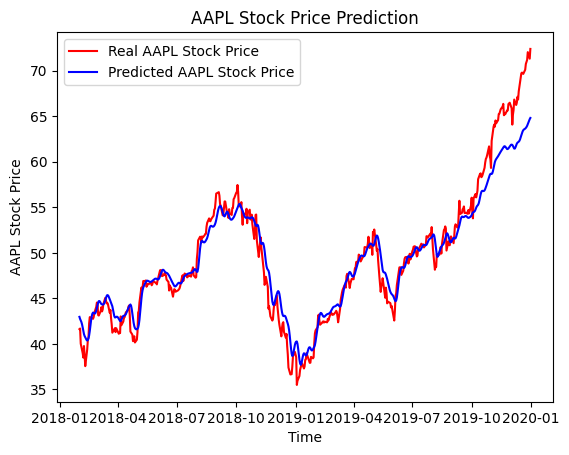

In [82]:
# Visualising the results
# Adjust the date range to match the number of predicted stock prices
date_range = apple_data.index[int(len(apple_data) * 0.8):][-len(predicted_stock_price):]
plt.plot(date_range, Y_test, color='red', label='Real AAPL Stock Price')
plt.plot(date_range,predicted_stock_price, color='blue', label='Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()

In [83]:
rmse = mean_squared_error(Y_test, predicted_stock_price)
rmse = np.sqrt(rmse)
print('RMSE: '+str(rmse))
mae = mean_absolute_error(Y_test, predicted_stock_price)
print('MAE: '+str(mae))
r2 = r2_score(Y_test, predicted_stock_price)
print('R2: '+str(r2))

RMSE: 2.0424306993432655
MAE: 1.417903030948795
R2: 0.927467224416195


# **Combining both models**

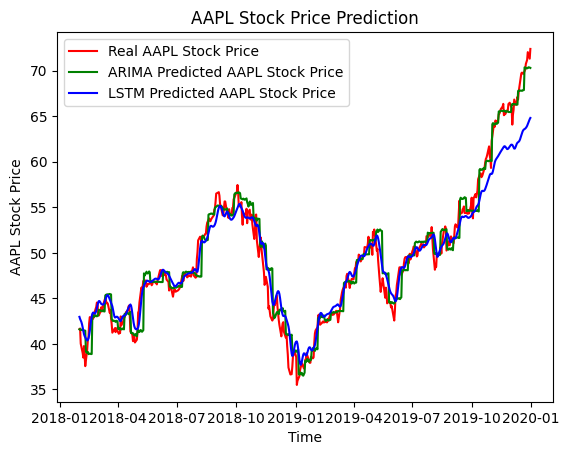

In [90]:
date_range = apple_data.index[int(len(apple_data) * 0.8):][-len(predicted_stock_price):]
plt.plot(date_range, Y_test , color='red', label='Real AAPL Stock Price')
plt.plot(date_range,all_forecasts[-len(predicted_stock_price):], color='green', label='ARIMA Predicted AAPL Stock Price')
plt.plot(date_range,predicted_stock_price, color='blue', label='LSTM Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()

In [91]:
y_pred_LSTM = predicted_stock_price
y_pred_ARIMA = all_forecasts[-len(predicted_stock_price):]

In [92]:
# Weighted soft voting
weight_LSTM = 0.4
weight_ARIMA = 0.6
y_final_weighted = (weight_LSTM * y_pred_LSTM) + (weight_ARIMA * y_pred_ARIMA)
print("Final predictions (Weighted):", y_final_weighted)

Final predictions (Weighted): [42.14658475 42.03233006 41.99201113 41.88741102 41.77747431 41.62568076
 41.45958633 41.31370896 41.22682931 41.16027735 39.73684484 39.59724827
 39.62094345 39.64362903 39.57067989 39.71295621 39.92527435 40.14315831
 40.35759723 40.54391906 43.1907969  43.25746406 43.20812099 43.12560346
 43.2127394  43.25872965 43.31396674 43.39033091 43.55523522 43.69033479
 44.114587   44.12844491 44.06820243 43.97446536 43.9079687  43.91828465
 43.91067552 43.94348585 43.90183906 43.96285016 45.09392805 45.24561592
 45.32302567 45.40928276 45.3753681  45.35272003 45.31682783 45.25061054
 45.15215326 45.07693112 43.36931688 43.2320697  43.02028039 42.88324453
 42.74427083 42.66763604 42.61753251 42.7164829  42.70253459 42.67711689
 42.13792793 42.10294106 41.99416801 42.06226721 41.99635681 42.00952929
 42.09505813 42.21265411 42.22491853 42.19596654 43.2177507  43.1542879
 43.23320688 43.44585395 43.48985653 43.53862071 43.54481278 43.60110198
 43.76019042 43.833551

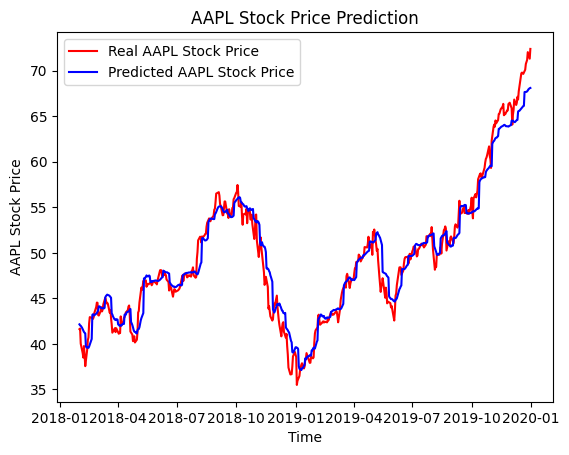

In [93]:
date_range = apple_data.index[int(len(apple_data) * 0.8):][-len(y_final_weighted):]
plt.plot(date_range, Y_test , color='red', label='Real AAPL Stock Price')
plt.plot(date_range,y_final_weighted, color='blue', label='Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()

In [94]:
print("Average Errors ARIMA:")
rmse = mean_squared_error(test_data['Close'], all_forecasts)
rmse = np.sqrt(rmse)
print('RMSE: '+str(rmse))
mae = mean_absolute_error(test_data['Close'], all_forecasts)
print('MAE: '+str(mae))
r2 = r2_score(test_data['Close'], all_forecasts)
print('R2: '+str(r2))

Average Errors ARIMA:
RMSE: 1.6248067496226128
MAE: 1.15052151355819
R2: 0.954098010774938


In [95]:
print("Average Errors LSTM:")
rmse = mean_squared_error(Y_test, predicted_stock_price)
rmse = np.sqrt(rmse)
print('RMSE: '+str(rmse))
mae = mean_absolute_error(Y_test, predicted_stock_price)
print('MAE: '+str(mae))
r2 = r2_score(Y_test, predicted_stock_price)
print('R2: '+str(r2))

Average Errors LSTM:
RMSE: 2.0424306993432655
MAE: 1.417903030948795
R2: 0.927467224416195


In [96]:
print("Average Errors Hybrid:")
rmse = mean_squared_error(Y_test, y_final_weighted)
rmse = np.sqrt(rmse)
print('RMSE: '+str(rmse))
mae = mean_absolute_error(Y_test, y_final_weighted)
print('MAE: '+str(mae))
r2 = r2_score(Y_test, y_final_weighted)
print('R2: '+str(r2))

Average Errors Hybrid:
RMSE: 1.5529818286027766
MAE: 1.1395306027691328
R2: 0.9580654115011373
